In [23]:
from tensorflow import keras
from keras.layers import Conv2D,Flatten,Dense
from keras.applications.xception import Xception,preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

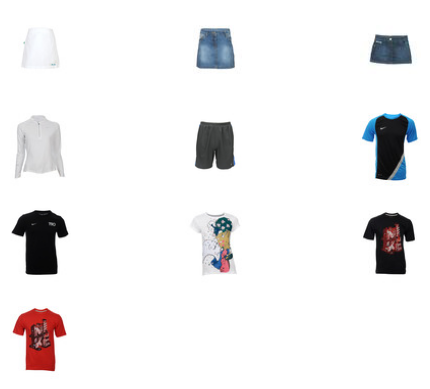

In [24]:
for i in range(10):
    ax = plt.subplot(4, 3, i + 1)
    img=plt.imread(r"C:\Users\bisht\Downloads\archive (60)\images\1000{}.jpg".format(i))
    plt.imshow(img)
    plt.axis("off")

In [25]:
from keras.models import Sequential
from keras.layers import GlobalMaxPooling2D

In [4]:
Xception=VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [5]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
vgg16.trainable=False

In [7]:
model=Sequential()
model.add(vgg16)
model.add(GlobalMaxPooling2D())

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_max_pooling2d (Glob  (None, 512)               0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 14714688 (56.13 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [9]:
import cv2 as cv
import numpy as np
from numpy.linalg import norm
def feature_extraction(path,model):
    img=cv.imread(path)
    img_array=cv.resize(img,(224,224))
    img=np.expand_dims(img_array,axis=0)
    preprocessed_img=preprocess_input(img)
    result=model.predict(preprocessed_img).flatten()
    normalized_output=result/norm(result)
    return normalized_output

In [10]:
feature_extraction(r"C:\Users\bisht\Downloads\archive (60)\images\10000.jpg",model)

1/1 [==============================] - 0s 357ms/step


array([0.01401271, 0.        , 0.        , 0.        , 0.        ,
       0.06517089, 0.03291382, 0.        , 0.        , 0.00712246,
       0.        , 0.        , 0.04615404, 0.        , 0.00637995,
       0.12814553, 0.        , 0.03653192, 0.        , 0.04984926,
       0.        , 0.        , 0.03268978, 0.03320147, 0.01477866,
       0.        , 0.11129583, 0.        , 0.03062424, 0.10514297,
       0.05229009, 0.0327663 , 0.02186999, 0.02051383, 0.01208738,
       0.        , 0.01419203, 0.01197615, 0.        , 0.        ,
       0.03122634, 0.        , 0.09571908, 0.02123276, 0.        ,
       0.01207244, 0.        , 0.11404067, 0.0248839 , 0.00894645,
       0.01466887, 0.05502265, 0.1619387 , 0.        , 0.0973566 ,
       0.00579801, 0.        , 0.        , 0.02127606, 0.02441981,
       0.        , 0.        , 0.        , 0.02798072, 0.        ,
       0.        , 0.04061852, 0.        , 0.        , 0.        ,
       0.        , 0.01704372, 0.05873202, 0.02295172, 0.00197

In [11]:
import os
path=r'C:\Users\bisht\Downloads\archive (60)\images'
img_name=[]
for image_path in os.listdir(path):
    img_name.append(os.path.join(path,image_path))

In [12]:
img_name.sort()
img_name

['C:\\Users\\bisht\\Downloads\\archive (60)\\images\\10000.jpg',
 'C:\\Users\\bisht\\Downloads\\archive (60)\\images\\10001.jpg',
 'C:\\Users\\bisht\\Downloads\\archive (60)\\images\\10002.jpg',
 'C:\\Users\\bisht\\Downloads\\archive (60)\\images\\10003.jpg',
 'C:\\Users\\bisht\\Downloads\\archive (60)\\images\\10004.jpg',
 'C:\\Users\\bisht\\Downloads\\archive (60)\\images\\10005.jpg',
 'C:\\Users\\bisht\\Downloads\\archive (60)\\images\\10006.jpg',
 'C:\\Users\\bisht\\Downloads\\archive (60)\\images\\10007.jpg',
 'C:\\Users\\bisht\\Downloads\\archive (60)\\images\\10008.jpg',
 'C:\\Users\\bisht\\Downloads\\archive (60)\\images\\10009.jpg',
 'C:\\Users\\bisht\\Downloads\\archive (60)\\images\\10010.jpg',
 'C:\\Users\\bisht\\Downloads\\archive (60)\\images\\10011.jpg',
 'C:\\Users\\bisht\\Downloads\\archive (60)\\images\\10012.jpg',
 'C:\\Users\\bisht\\Downloads\\archive (60)\\images\\10013.jpg',
 'C:\\Users\\bisht\\Downloads\\archive (60)\\images\\10014.jpg',
 'C:\\Users\\bisht\\Downl

In [13]:
import pickle
pickle.dump(img_name,open('image_path.pkl','wb'))

In [14]:
feature_list=[]
for image in img_name:
    feature=feature_extraction(image,model)
    feature_list.append(feature)
    

1/1 [==============================] - 0s 145ms/step


1/1 [==============================] - 0s 150ms/step


1/1 [==============================] - 0s 141ms/step


1/1 [==============================] - 0s 130ms/step


1/1 [==============================] - 0s 176ms/step


1/1 [==============================] - 0s 147ms/step


1/1 [==============================] - 0s 142ms/step


1/1 [==============================] - 0s 180ms/step


1/1 [==============================] - 0s 240ms/step


1/1 [==============================] - 0s 300ms/step


1/1 [==============================] - 0s 279ms/step


1/1 [==============================] - 0s 276ms/step


1/1 [==============================] - 0s 363ms/step


1/1 [==============================] - 0s 395ms/step


1/1 [==============================] - 1s 711ms/step


1/1 [==============================] - 0s 470ms/step


1/1 [==============================] - 0s 421ms/step


1/1 [==============================] - 1s 524ms/step


1/1 [==============================] - 1s 592ms/step


1/1 [==============================] - 1s 586ms/step


1/1 [==============================] - 1s 600ms/step


1/1 [==============================] - 1s 602ms/step


1/1 [==============================] - 1s 649ms/step


1/1 [==============================] - 1s 636ms/step


1/1 [==============================] - 1s 757ms/step


1/1 [==============================] - 1s 717ms/step


1/1 [==============================] - 1s 721ms/step


1/1 [==============================] - 1s 859ms/step


1/1 [==============================] - 1s 821ms/step


1/1 [==============================] - 1s 979ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step


KeyboardInterrupt: 

In [22]:
pickle.dump(feature_list,open('allfeatures.pkl','wb'))